In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('daily-total-female-births.csv',header=0,index_col=0)
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [4]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
df.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


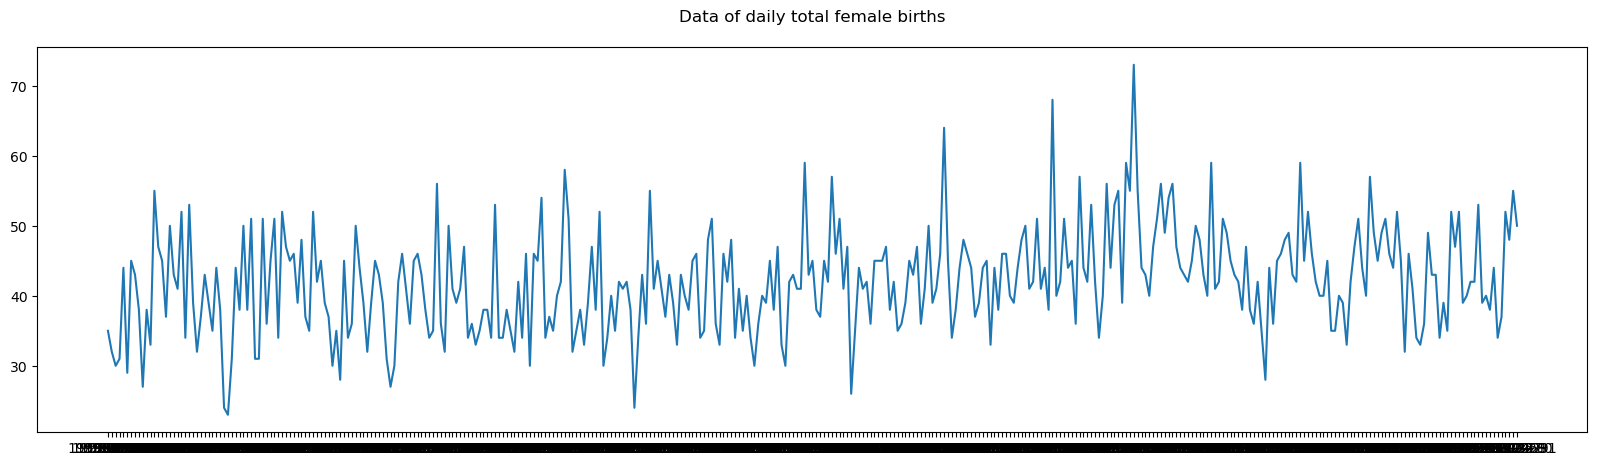

In [6]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(df)
plt.title('Data of daily total female births\n')
plt.show()

<Axes: xlabel='Births', ylabel='Density'>

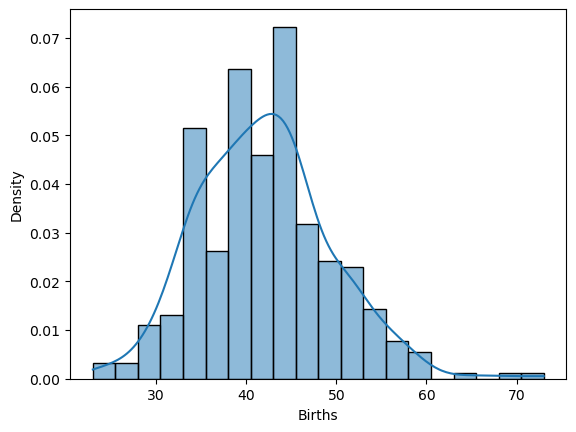

In [8]:
import seaborn as sns
sns.histplot(df['Births'],kde=True,stat='density')

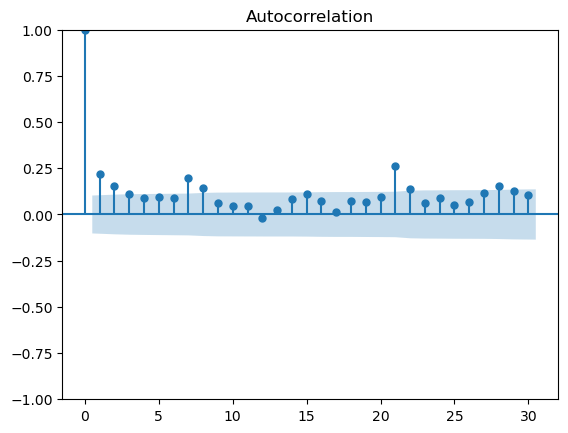

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
pacf=plot_acf(df['Births'],lags=30)

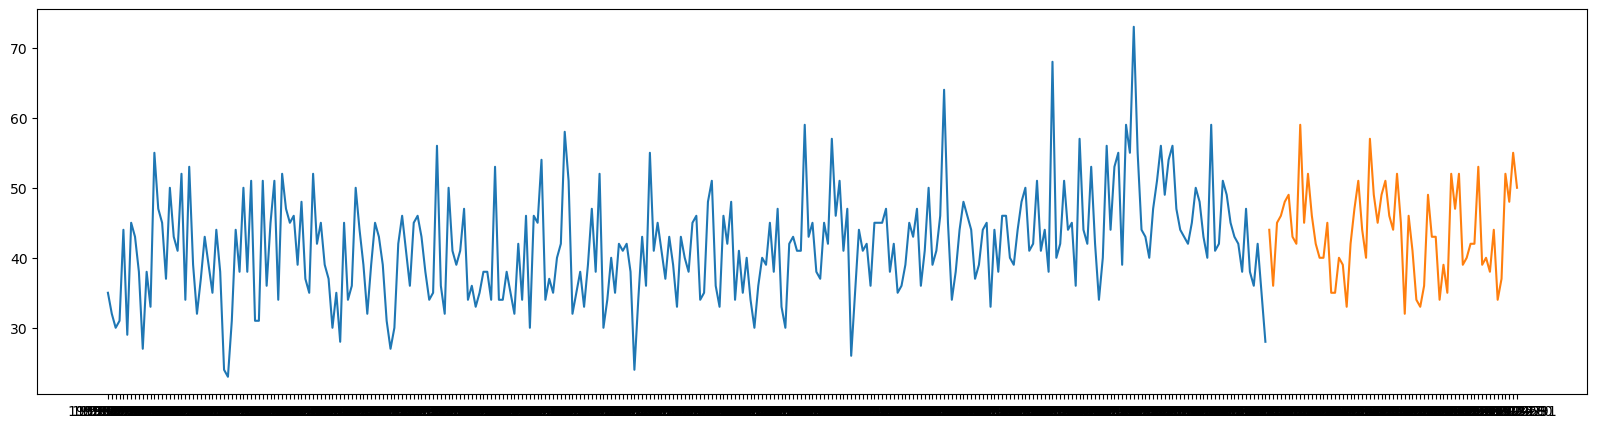

In [12]:
train=df[:300]
test=df[-65:]
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(test)

In [13]:
train.shape

(300, 1)

In [14]:
test.shape

(65, 1)

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.head())

Test RMSE: 9.151
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


In [78]:
import statsmodels.api as sm

def movingaverage(endog, e_at_t=1):
    
    E_data = pd.concat([endog.shift(i) for i in range(1, e_at_t + 1)], axis=1)
    E_data.columns = [f'e_at_t_{i}' for i in range(1, lags + 1)]
    
    
    E_data = E_data.dropna()
    
    
    E_data = sm.add_constant(E_data)
    
    
    y = E_data['e_at_t_1']
    
    
    X = E_data.drop(['e_at_t_1'], axis=1)
    
    
    model = sm.OLS(y,X).fit()
    
    return model

In [80]:
model = movingaverage(residuals,e_at_t=15)

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               e_at_t_1   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     4.342
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           6.61e-06
Time:                        12:16:35   Log-Likelihood:                -362.56
No. Observations:                 110   AIC:                             755.1
Df Residuals:                      95   BIC:                             795.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.672     -0.019      0.985      -1.346       1.321
e_at_t_2      -0.6638      0.103     -6.458      0.000      -0.868      -0.460
e_at_t_3      -0.4985      0.121     -4.108      0.000      -0.739      -0.258
e_at_t_4      -0.3964      0.132     -3.013      0.003      -0.658      -0.135
e_at_t_5      -0.4203      0.137     -3.066      0.003      -0.693      -0.148
e_at_t_6      -0.3309      0.140     -2.364      0.020      -0.609      -0.053
e_at_t_7      -0.2462      0.140     -1.760      0.082      -0.524       0.031
e_at_t_8      -0.0561      0.140     -0.399      0.690      -0.335       0.223
e_at_t_9      -0.2510      0.141     -1.785      0.078      -0.530       0.028
e_at_t_10     -0.3134      0.139     -2.252      0.027      -0.590      -0.037
e_at_t_11     -0.2912      0.138     -2.113      0.037      -0.565      -0.018
e_at_t_12     -0.2110      0.135     -1.561      0.122      -0.479       0.057
e_at_t_13     -0.2990      0.130     -2.295      0.024      -0.558      -0.040
e_at_t_14     -0.2935      0.121     -2.427      0.017      -0.534      -0.053
e_at_t_15     -0.1024      0.099     -1.032      0.305      -0.300       0.095
==============================================================================
Omnibus:                        2.584   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.603
Skew:                           0.355   Prob(JB):                        0.272
Kurtosis:                       2.745   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
prediction=pd.DataFrame(model.predict())
prediction.columns=['predicted_births']
prediction

,predicted_births
0,6.062350
1,-5.993694
2,0.021287
3,5.980187
4,9.044017
...,...
105,-2.260357
106,4.761105
107,3.998587
108,-9.445107


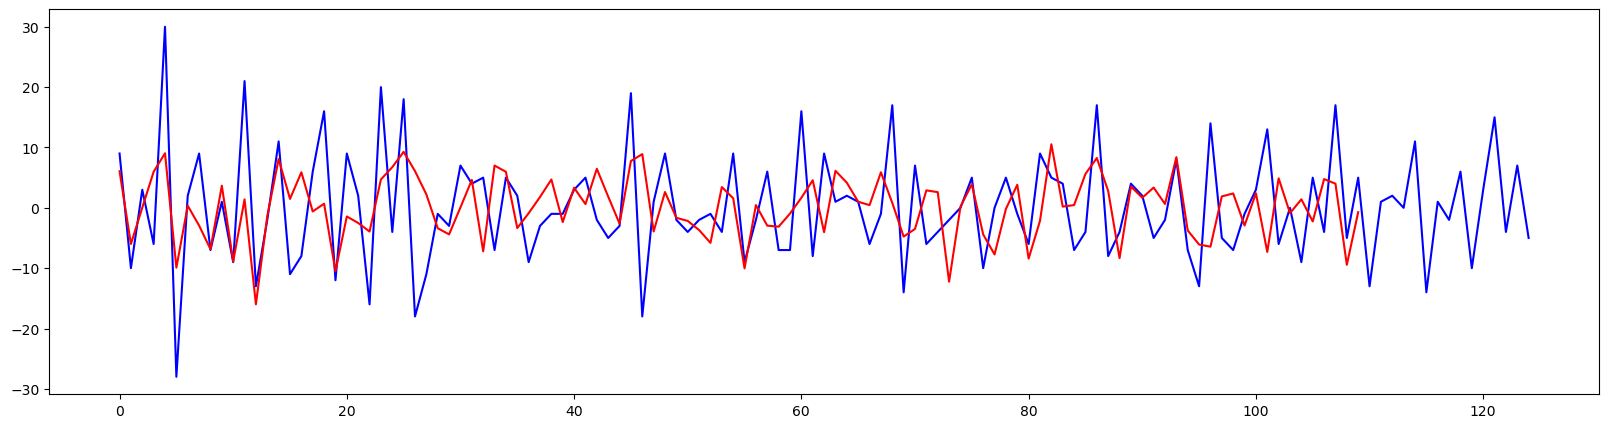

In [83]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(residuals,color='blue')
plt.plot(prediction,color='red')
plt.show()

In [85]:
from math import sqrt

rmse = sqrt(mean_squared_error(residuals, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 47.186
